#The Linear Transport Equation

This example breaks down the components of an important mathematical model and several discretization concepts. See course lectures 1 & 2 for more background information.

#Required Modules

These are common Python modules that are necessary to run this code and most code moving forward. You will become familiar with them.

In [3]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import time
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython import display

These lines of code declare constants and variables that we will reference in the algorithm further below.

In [2]:
xl = 2             # x length
nx = 600           # number of grid points
dx = xl/(nx-1)     # x stepsize
nt = 350           # number of timesteps
dt = 0.0025        # time stepsize
c = 1              # wave speed
g = .01            # gaussian variance parameter (peak width)

The following line utilizes numpy to generate an array of x-values that go from 0 to xl using nx points that will act as our computational domain, which is sometimes called a grid.

In [3]:
x = np.linspace(0,xl,nx)      # x grid 

Theta as defined below is an important parameter used in defining our initial condition (IC) for our numerical model.

In [4]:
theta = x/(0.5*xl)     # gaussian mean parameter (peak position)

Additionally, the CFL condition is used to describe the numerical stability of the model with respect to the wave speed c and the numerical step-sizes for time and space, dt and dx.

In [5]:
cfl = round(c*dt/dx,2)     # cfl condition 2 decimal places

We can include a simple if statement that notifies us of our standing with the CFL condition before we start solving. Take note of the % syntax here used to insert a variable into a sentence comprised of strings, there are also other ways to do this that will be covered later on.

In [6]:
if cfl >= 1:
    print('Hold your horses! The CFL is %s, which is over 1' %(cfl))
else:
    print('CFL = %s' %(cfl))

CFL = 0.75


Finally, the last step before starting the solution algorithm is to generate some solution placeholder arrays along with our initial condition, which is a gaussian pulse as plotted below using matplotlib.

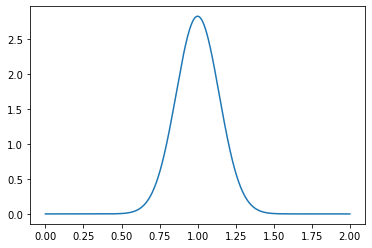

In [11]:
u = np.ones(nx)                                             # initializing solution array
un = np.ones(nx)                                            # initializing temporary solution array
u = (1/(2*np.sqrt(np.pi*(g))))*np.exp(-(1-theta)**2/(4*g))  # initial condition (IC) as a gaussian
plt.plot(x,u)                                               # plots IC
u_init = u.copy()                                           # stores initial condition

We can also spruce up this plot with some axis titles, and a legend.

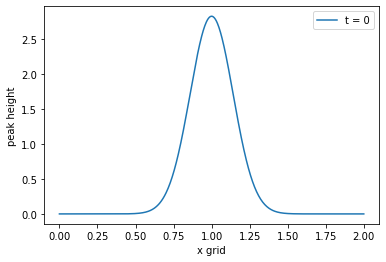

In [8]:
plt.plot(x,u,label='t = 0')
plt.xlabel('x grid')
plt.ylabel('peak height')
plt.legend()

It can be helpful to know how long it takes for a solver to run for multiple reasons, such as comparing convergence criteria, time-steps, or discretization methods. So we declare a variable that records the time before we start solving, which is directly below.

The discretization scheme here used is the Backward Discretization Scheme in space (often called the Upwind Discretization Scheme) and the Explicit (Forward) Euler's Method. In this first example we use nested for-loops - one for the spatial steps, and an outer loop for the time steps.

The boundary conditions applied are periodic BCs, simply meaning that this wave will keep on going through the right, and back into scene from the left.

In [14]:
start = time.process_time()
for n in range(nt):
    un = u.copy()
    for i in range(1,nx-1):
        u[i] = un[i] - c*dt/(dx)*(un[i]-un[i-1])
        # periodic BC's
        u[0] = u[nx-2] 
        u[nx-1] = u[1]
        
end = time.process_time()
print(end-start)

0.5625


As shown, this method took less than a second to solve with the "default" settings applied, however for more complex and larger systems, this is not the case. We can use the defintion of nt and dt to calculate how long this wave traveled for, and plot it below.

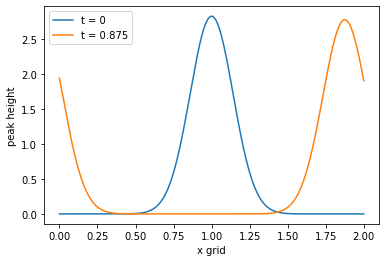

In [15]:
t = nt*dt
plt.plot(x,u_init,label='t = 0')
plt.plot(x,u,label='t = %s'%(t))
plt.xlabel('x grid')
plt.ylabel('peak height')
plt.legend()

Even more clearly shown in the gif below, you can see the effect of the periodic BCs as the wave has exited stage right and started to smoothly re-enter from the left.

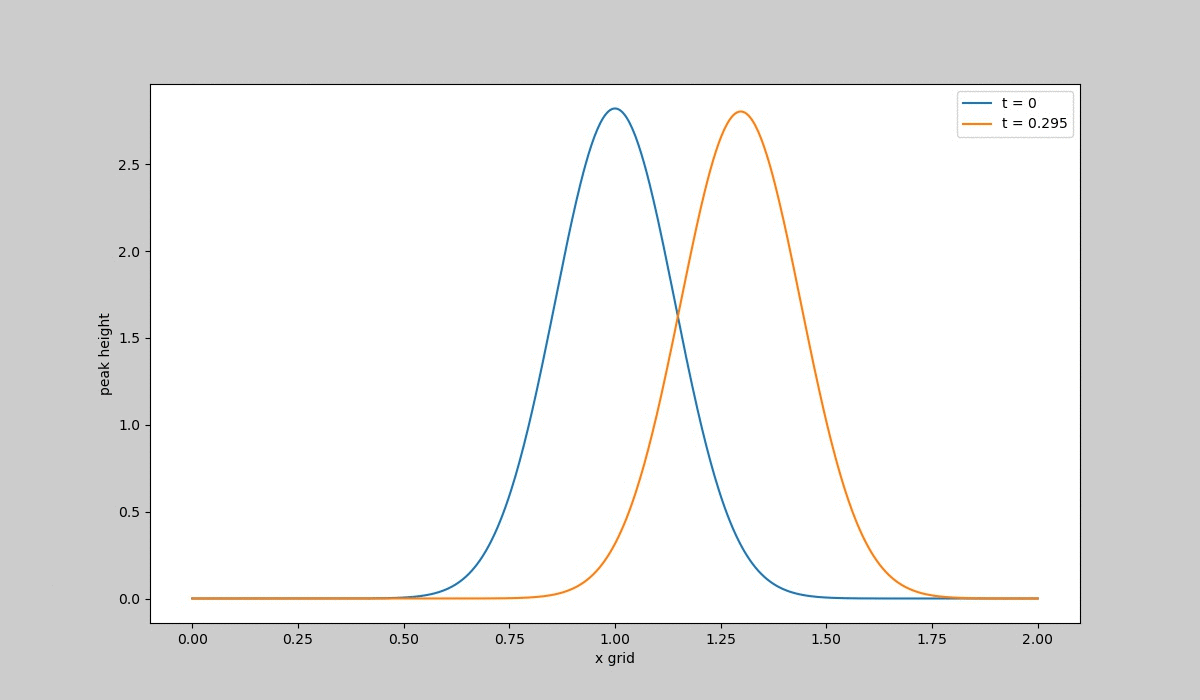

In [5]:
from pathlib import Path
gifPath = Path("C:/Users/Cam/Downloads/the_wave_example.gif")
with open(gifPath,'rb') as f:
    display.Image(data=f.read(), format='png')